In [11]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline

#Load a special color map which helps us view labels
num_classes = 255
GLASBEYLUT = 'glasbey.lut'
glasbey_lut = (np.loadtxt(GLASBEYLUT, dtype=np.float) / 255.0)[:,1:]
cmap = mpl.colors.ListedColormap (glasbey_lut,'Glasbey',num_classes)
norm = mpl.colors.Normalize(vmin=0, vmax=num_classes)



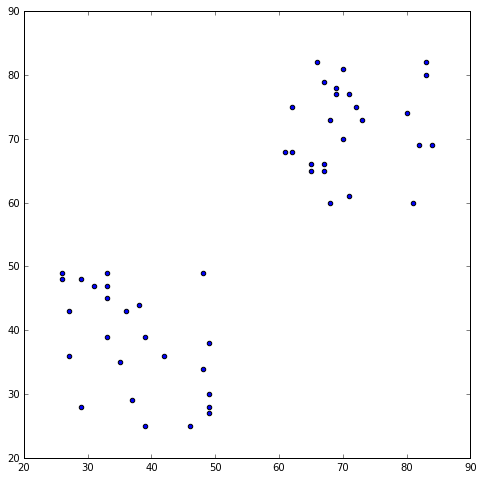

In [12]:
#Lets generate some random data and plot it

X = np.random.randint(25,50,(25,2))
Y = np.random.randint(60,85,(25,2))
Z = np.vstack((X,Y))
Z = np.float32(Z)

fig = plt.figure(figsize=(8,8))
plt.scatter(Z[:,0],Z[:,1])
plt.show()


In [13]:
# Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Apply KMeans
K = 2
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,flags = cv2.KMEANS_RANDOM_CENTERS)

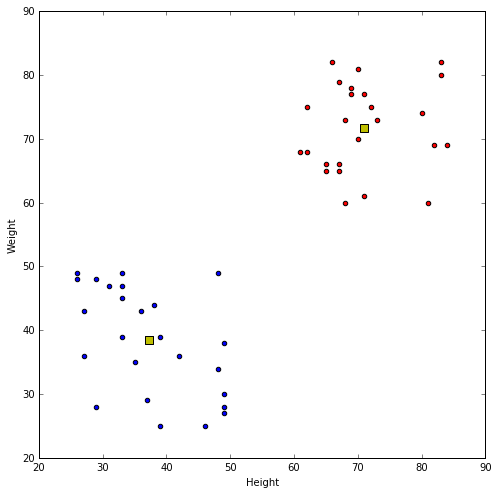

In [14]:
# Now separate the data, Note the flatten()
A = Z[label.ravel()==0]
B = Z[label.ravel()==1]

# Plot the data
fig = plt.figure(figsize=(8,8))
plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1],c = 'r')
plt.scatter(center[:,0],center[:,1],s = 80,c = 'y', marker = 's')
plt.xlabel('Height'),plt.ylabel('Weight')
plt.show()

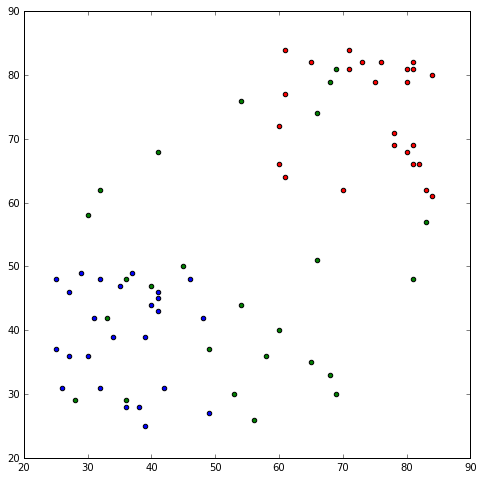

In [15]:
#Lets generate some random data and plot it
small_people = np.random.randint(25,50,(25,2))
tall_people = np.random.randint(60,85,(25,2))
weird_people = np.random.randint(25,85,(25,2))
Z = np.vstack((small_people,tall_people,weird_people))
Z = np.float32(Z)

fig = plt.figure(figsize=(8,8))
plt.scatter(small_people[:,0],small_people[:,1])
plt.scatter(tall_people[:,0],tall_people[:,1],c = 'r')
plt.scatter(weird_people[:,0],weird_people[:,1],c = 'g')
plt.show()



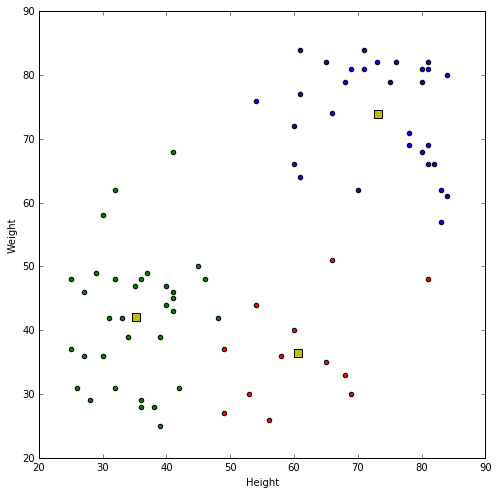

In [16]:
# Apply KMeans
K = 3
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,flags = cv2.KMEANS_RANDOM_CENTERS)

# Now separate the data, Note the flatten()
A = Z[label.ravel()==0]
B = Z[label.ravel()==1]
C = Z[label.ravel()==2]
# Plot the data
fig = plt.figure(figsize=(8,8))
plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1],c = 'r')
plt.scatter(C[:,0],C[:,1],c = 'g')
plt.scatter(center[:,0],center[:,1],s = 80,c = 'y', marker = 's')
plt.xlabel('Height'),plt.ylabel('Weight')
plt.show()

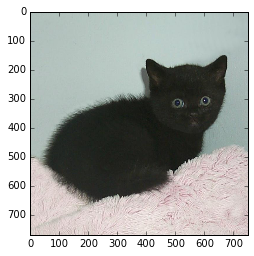

In [19]:
img = cv2.imread('kittens/black_kitten_star.jpg')
#img = cv2.imread('kittens/black-white-kittens2.jpg')
#img = cv2.imread('kittens/cat-jumping-running-grass.jpg')
#img = cv2.imread('kittens/kitten16.jpg')

img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)


Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
plt.imshow(img)

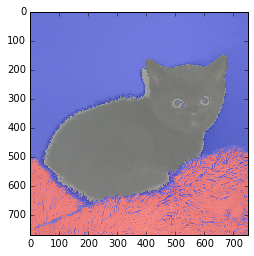

In [18]:
#Plot the labeled image
plt.imshow(label.reshape((img.shape[0:2])),cmap = cmap, norm=norm)
plt.hold(True)
plt.imshow(img, alpha = 0.6)

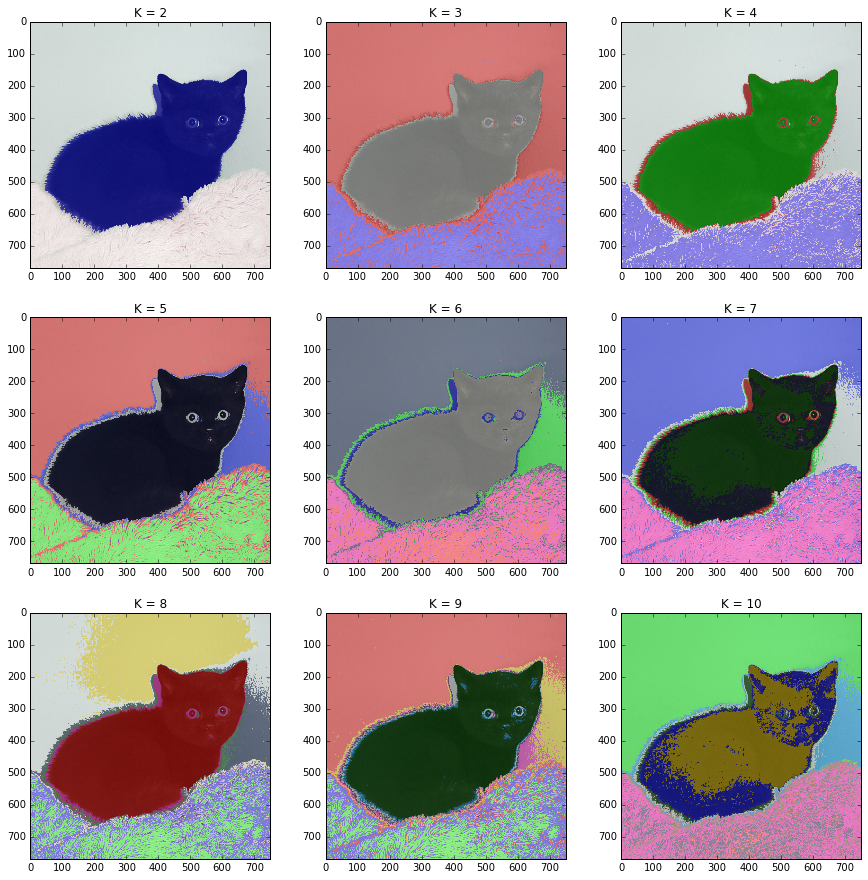

In [20]:
import matplotlib.gridspec as gridspec
num_rows = 3
num_cols = 3
fig = plt.figure(figsize=(num_rows*5, num_cols*5))
gs = gridspec.GridSpec(num_rows, num_cols)
for r in range(num_rows):
        for c in range (num_cols):
            ax = plt.subplot(gs[r,c])
            
            K = r*num_cols + c + 2
            ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

            ax.imshow(label.reshape((img.shape[0:2])),cmap = cmap, norm=norm)
            plt.hold(True)
            ax.imshow(img, alpha = 0.6)
            ax.set_title("K = {}".format(r*num_cols + c + 2))

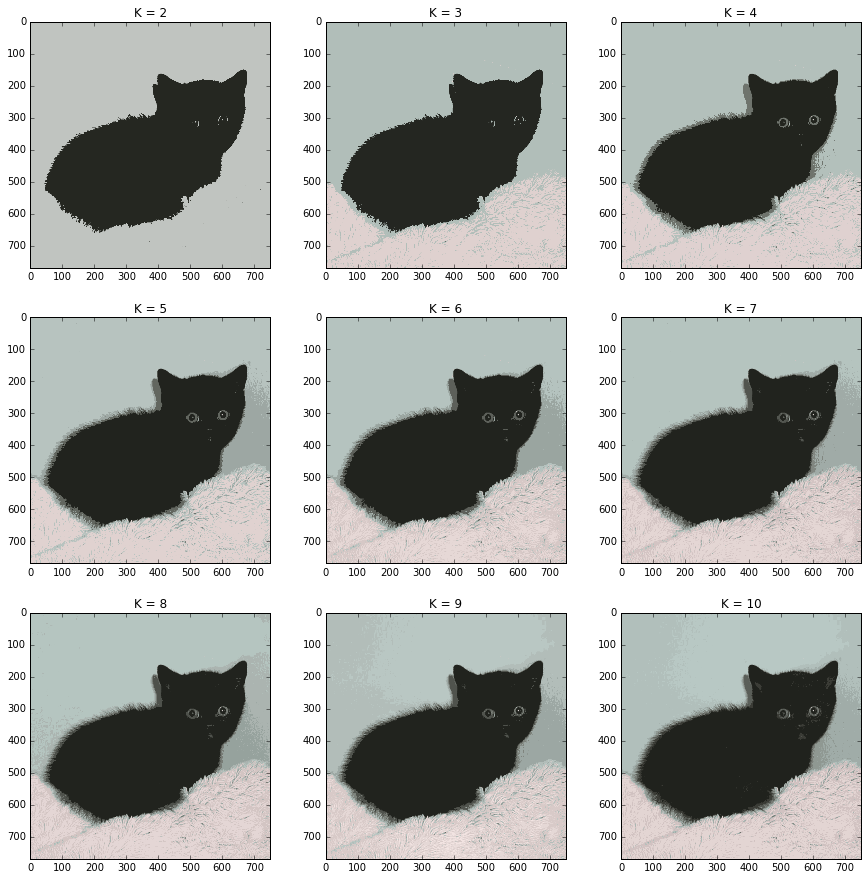

In [21]:
fig = plt.figure(figsize=(num_rows*5, num_cols*5))
gs = gridspec.GridSpec(num_rows, num_cols)
for r in range(num_rows):
        for c in range (num_cols):
            ax = plt.subplot(gs[r,c])
            
            K = r*num_cols + c + 2
            ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

            # Now convert back into uint8, and make original image
            center = np.uint8(center)
            res = center[label.flatten()]
            
            ax.imshow(res.reshape((img.shape)),cmap = cmap, norm=norm)
            ax.set_title("K = {}".format(r*num_cols + c + 2))

           